In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
us_data = pd.read_csv('data/USvideos.csv')
ca_data = pd.read_csv('data/CAvideos.csv')
gb_data = pd.read_csv('data/GBvideos.csv')

In [4]:
frames = [us_data, ca_data, gb_data]
whole_data = pd.concat(frames)
whole_data.drop_duplicates(keep=False,inplace=True) 

In [4]:
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
ca_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [6]:
df = us_data.groupby(by=['channel_title', 'video_id'])

In [7]:
df.first()

trending_date  \
channel_title          video_id                    
12 News                9KIP-Ncp2jU      17.15.11   
1MILLION Dance Studio  QRq0pkr2TWM      18.25.02   
                       WdOGSNQP9b4      18.08.03   
                       XKl8Wg25DrM      18.14.04   
                       _xwX82Y0Oro      18.01.03   
...                                          ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ      17.03.12   
圧倒的不審者の極み!             MeNR0guNn70      18.05.03   
杰威爾音樂 JVR Music        MAjY8mCTXWk      18.15.05   
郭韋辰                    smRlXuBcp3c      17.07.12   
영국남자 Korean Englishman VioegwSjypk      18.04.01   

                                                                                title  \
channel_title          video_id                                                         
12 News                9KIP-Ncp2jU  Bill Gates bought land in Arizona to build tec...   
1MILLION Dance Studio  QRq0pkr2TWM        Cheap Thrills - Sia / Tina Boo Choreography   
                       WdOGSNQP9b4  This is me - The Greatest Showman OST / Jun Li...   
                       XKl8Wg25DrM  Joga O Bum Bum Tam Tam - MC Fioti / Rikimaru C...   
                       _xwX82Y0Oro  FRIENDS - Marshmello & Anne-Marie / Tina Boo C...   
...                                                                               ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ    『ニンジャバットマン』 New York Comic Con公開映像【2018年劇場公開予定】   
圧倒的不審者の極み!             MeNR0guNn70                               世界で一番切れるパスタの包丁を作りたい！   
杰威爾音樂 JVR Music        MAjY8mCTXWk  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...   
郭韋辰                    smRlXuBcp3c  2017-11-30-中國文化大學彩虹縮時(Taiwan,Taipei,CCU)   Thr...   
영국남자 Korean Englishman VioegwSjypk               한국 치맥 왕중왕전: 외국인 입맛에 제일 잘 맞는 한국 치킨은?!   

                                    category_id              publish_time  \
channel_title          video_id                                             
12 News                9KIP-Ncp2jU           22  2017-11-11T01:03:01.000Z   
1MILLION Dance Studio  QRq0pkr2TWM           24  2018-02-19T12:00:02.000Z   
                       WdOGSNQP9b4           24  2018-03-07T12:00:04.000Z   
                       XKl8Wg25DrM           24  2018-04-10T12:00:05.000Z   
                       _xwX82Y0Oro           24  2018-02-28T09:00:03.000Z   
...                                         ...                       ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ            1  2017-12-01T09:06:02.000Z   
圧倒的不審者の極み!             MeNR0guNn70           28  2018-03-03T16:16:15.000Z   
杰威爾音樂 JVR Music        MAjY8mCTXWk           10  2018-05-14T15:59:47.000Z   
郭韋辰                    smRlXuBcp3c           28  2017-11-30T16:44:51.000Z   
영국남자 Korean Englishman VioegwSjypk           23  2018-01-03T11:31:18.000Z   

                                                                                 tags  \
channel_title          video_id                                                         
12 News                9KIP-Ncp2jU  Arizona|"Bill gates"|"land"|"tech city"|"smart...   
1MILLION Dance Studio  QRq0pkr2TWM  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       WdOGSNQP9b4  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       XKl8Wg25DrM  choreography|"1million dance studio"|"원밀리언 댄스 ...   
                       _xwX82Y0Oro  choreography|"1million dance studio"|"원밀리언 댄스 ...   
...                                                                               ...   
ワーナー ブラザース 公式チャンネル     QF031DwMffQ  ニンジャバットマン|"batman ninja"|"batman"|"神風動画"|"水﨑淳平...   
圧倒的不審者の極み!             MeNR0guNn70  kiwami|"作ってみた"|"作り方"|"作成"|"作製"|"自作"|"How"|"to"...   
杰威爾音樂 JVR Music        MAjY8mCTXWk  周杰倫|"Jay"|"Chou"|"周董"|"周杰伦"|"周傑倫"|"杰威尔"|"周周"|"...   
郭韋辰                    smRlXuBcp3c                                             [none]   
영국남자 Korean Englishman VioegwSjypk  Korean|"영국남자"|"영국"|"조쉬"|"올리"|"Josh"|"Ollie"|"K...   

                                     vie

In [8]:
us_channel = us_data.groupby("channel_title").get_group("12 News")

In [10]:
def get_channel_info(channel_name, data):
    channel = data.groupby("channel_title").get_group(channel_name)
    return channel

In [11]:
get_channel_info('12 News', us_data)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
318,9KIP-Ncp2jU,17.15.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",85643,170,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...
555,9KIP-Ncp2jU,17.16.11,Bill Gates bought land in Arizona to build tec...,12 News,22,2017-11-11T01:03:01.000Z,"Arizona|""Bill gates""|""land""|""tech city""|""smart...",92327,182,45,0,https://i.ytimg.com/vi/9KIP-Ncp2jU/default.jpg,False,False,False,Philanthropist and inventor Bill Gates paid $...


In [12]:
def generate_tags_count_dict(data):
    tags = data['tags']
    tags_count_dict = {}
    for line in tags:
        line = line.lower()
        line = line.split("|")
        for word in line:
            word = re.sub("(\")","",word)
            if word not in tags_count_dict.keys():
                tags_count_dict[word] = 0
            tags_count_dict[word] = tags_count_dict[word] + 1
    return tags_count_dict

In [13]:
us_tags_count_dict = generate_tags_count_dict(us_data)

In [14]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [15]:
def generate_info_dict(data):
    info = {}
    info['count'] = len(data)
    info['most_pop_video'] = data.sort_values(by='views', ascending=False).iloc[0]['video_id']
    info['max_views'] = data.sort_values(by='views', ascending=False).iloc[0]['views']
    info['total_views'] = sum(data['views'])
    info['avg_views'] = data['views'].mean()
    info['max_likes'] = data.sort_values(by='likes', ascending=False).iloc[0]['likes']
    info['total_likes'] = sum(data['likes'])
    info['avg_likes'] = data['likes'].mean()
    info['total_dislikes'] = sum(data['dislikes'])
    info['avg_dislikes'] = data['dislikes'].mean()
    info['total_comment'] = sum(data['comment_count'])
    info['avg_comment'] = data['comment_count'].mean()
    return info

In [17]:
generate_info_dict(us_channel)

{'count': 2,
 'most_pop_video': '9KIP-Ncp2jU',
 'max_views': 92327,
 'total_views': 177970,
 'avg_views': 88985.0,
 'max_likes': 182,
 'total_likes': 352,
 'avg_likes': 176.0,
 'total_dislikes': 90,
 'avg_dislikes': 45.0,
 'total_comment': 0,
 'avg_comment': 0.0}

In [18]:
generate_info_dict(us_data)

{'count': 40949,
 'most_pop_video': 'VYOjWnS4cMY',
 'max_views': 225211923,
 'total_views': 96671770152,
 'avg_views': 2360784.6382573447,
 'max_likes': 5613827,
 'total_likes': 3041147198,
 'avg_likes': 74266.7024347359,
 'total_dislikes': 151978155,
 'avg_dislikes': 3711.400888910596,
 'total_comment': 345888164,
 'avg_comment': 8446.803682629612}

In [19]:
def generate_channel_dict(data):
    channel_tags_dict = {}
    channel_video_dict = {}
    channel_category_dict = {}
    channel_info_dict = {}
    channel_list = set(data['channel_title'])
    for channel in channel_list:
        channel_data = data.groupby("channel_title").get_group(channel)
        channel_info_dict[channel] = generate_info_dict(channel_data)
        channel_video_dict[channel] = channel_data['video_id'].tolist()
        channel_tags_dict[channel] = generate_tags_count_dict(channel_data)
        channel_category_dict[channel] = set(channel_data['category_id'])
    return channel_info_dict, channel_tags_dict, channel_video_dict, channel_category_dict

In [20]:
us_channel_info_dict, us_channel_tags_dict, us_channel_video_dict, us_channel_category_dict = generate_channel_dict(us_data)

In [21]:
def generate_category_dicts(data):
    category_tags_dict = {}
    category_video_dict = {}
    category_channel_dict = {}
    category_info_dict = {}
    category_list = set(data['category_id'])
    print(category_list)
    for category_id in category_list:
        cate_data = data.groupby("category_id").get_group(category_id)
        category_info_dict[category_id] = generate_info_dict(cate_data)
        category_video_dict[category_id] = cate_data['video_id'].tolist()
        category_tags_dict[category_id] = generate_tags_count_dict(cate_data)
        category_channel_dict[category_id] = set(cate_data['channel_title'])
        #data = data.groupby("category_id").get_group(category_id)
    return category_info_dict, category_tags_dict, category_video_dict, category_channel_dict

In [22]:
us_cate_info, us_cate_tag, us_cate_video, us_cate_channel = generate_category_dicts(us_data)

{1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29}


In [23]:
ca_cate_info, ca_cate_tag, ca_cate_video, ca_cate_channel = generate_category_dicts(ca_data)
gb_cate_info, gb_cate_tag, gb_cate_video, gb_cate_channel = generate_category_dicts(gb_data)

{1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30}
{1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29}


In [24]:
whole_cate_info, whole_cate_tag, whole_cate_video, whole_cate_channel = generate_category_dicts(whole_data)

{1, 2, 10, 43, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30}


In [25]:
us_cate_info

{1: {'count': 2345,
  'most_pop_video': 'ulNswX3If6U',
  'max_views': 54863912,
  'total_views': 7284156721,
  'avg_views': 3106250.2008528784,
  'max_likes': 922355,
  'total_likes': 165997476,
  'avg_likes': 70787.83624733475,
  'total_dislikes': 6075148,
  'avg_dislikes': 2590.68144989339,
  'total_comment': 17887060,
  'avg_comment': 7627.744136460555},
 2: {'count': 384,
  'most_pop_video': 'cqg5oc20nxk',
  'max_views': 25244097,
  'total_views': 520690717,
  'avg_views': 1355965.4088541667,
  'max_likes': 97030,
  'total_likes': 4245656,
  'avg_likes': 11056.395833333334,
  'total_dislikes': 243010,
  'avg_dislikes': 632.8385416666666,
  'total_comment': 784447,
  'avg_comment': 2042.8307291666667},
 10: {'count': 6472,
  'most_pop_video': 'VYOjWnS4cMY',
  'max_views': 225211923,
  'total_views': 40132892190,
  'avg_views': 6201003.119592089,
  'max_likes': 5613827,
  'total_likes': 1416838584,
  'avg_likes': 218918.19901112485,
  'total_dislikes': 51179008,
  'avg_dislikes': 790

In [26]:
us_data['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 40949, dtype: object

In [27]:
def views_category_graph(cate_info):
    max_view_list = []
    category = []
    for item in cate_info.items():
        max_view_list.append(item[1]['max_views'])
        category.append(str(item[0]))
    plt.bar(category, max_view_list)
    plt.ylabel("highest views")
    plt.xlabel("category_id")

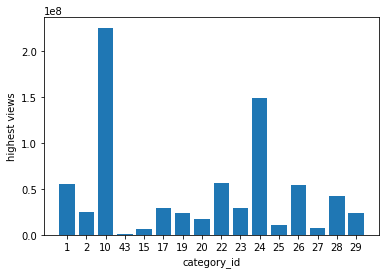

In [28]:
views_category_graph(us_cate_info)

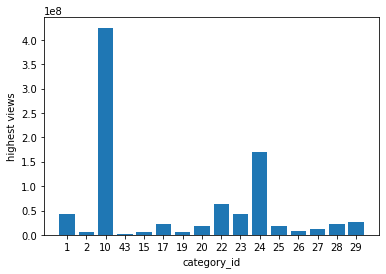

In [29]:
views_category_graph(gb_cate_info)

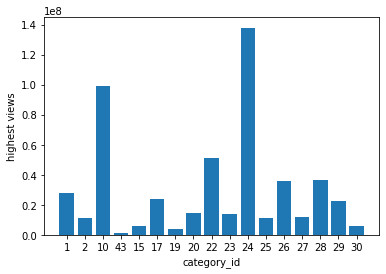

In [30]:
views_category_graph(ca_cate_info)

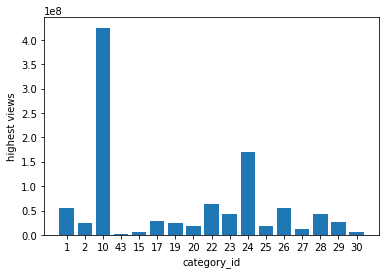

In [31]:
views_category_graph(whole_cate_info)

In [32]:
def num_contents_category_graph(cate_info):
    count_list = []
    category = []
    for item in cate_info.items():
        count_list.append(item[1]['count'])
        category.append(str(item[0]))
    plt.bar(category, count_list)
    plt.ylabel("number of contents")
    plt.xlabel("category_id")

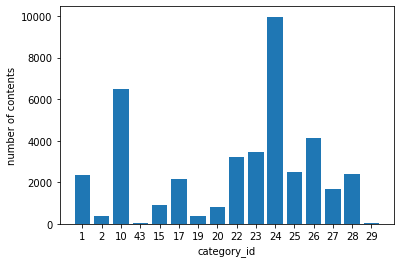

In [33]:
num_contents_category_graph(us_cate_info)

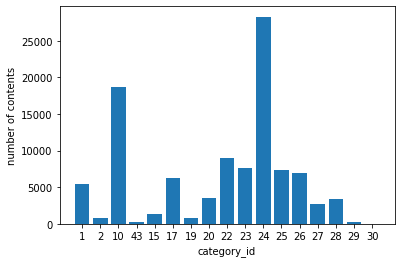

In [34]:
num_contents_category_graph(whole_cate_info)

In [35]:
def corr_likes_views_graph(cate_info):
    view_list = []
    like_list = []
    for item in cate_info.items():
        view_list.append(item[1]['avg_views'])
        like_list.append(item[1]['avg_likes'])
    view_list = np.array([round(num) for num in view_list])
    like_list = np.array([round(num) for num in like_list])
    plt.scatter(like_list, view_list)
    m,b = np.polyfit(like_list, view_list, 1)
    plt.plot(like_list, m*like_list + b)
    plt.ylabel("avgerage views")
    plt.xlabel("average likes")

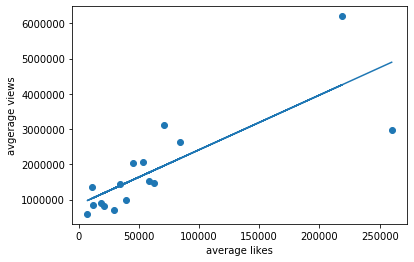

In [36]:
corr_likes_views_graph(us_cate_info)

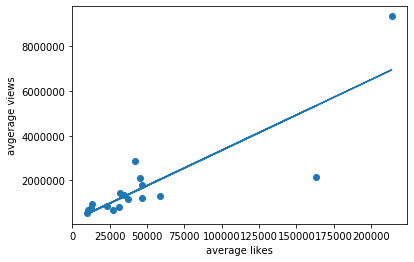

In [37]:
corr_likes_views_graph(whole_cate_info)

In [38]:
def generate_top_tag_each_category_chart(cate_tag):
    category = []
    tag = []
    tag_count = []
    for item in cate_tag.items():
        category.append(str(item[0]))
        sorted_d = sorted(item[1].items(), key=lambda x:x[1], reverse=True)
        tag.append(sorted_d[0][0])
        tag_count.append(sorted_d[0][1])
    top_tag_each_category = pd.DataFrame(list(zip(tag, tag_count)), index=category, columns=['tag', 'counts'])
    return top_tag_each_category

In [39]:
generate_top_tag_each_category_chart(us_cate_tag)

,tag,counts
1,trailer,642
2,doug demuro,60
10,pop,1511
43,bleacher report,41
15,animals,428
17,sports,552
19,travel,100
20,gameplay,148
22,buzzfeed,490
23,funny,1436


In [40]:
generate_top_tag_each_category_chart(ca_cate_tag)

,tag,counts
1,trailer,292
2,doug demuro,123
10,rap,496
43,priyamanaval today episode,62
15,animals,136
17,nba,772
19,street food,165
20,gameplay,287
22,[none],811
23,funny,1253


In [41]:
generate_top_tag_each_category_chart(gb_cate_tag)

,tag,counts
1,trailer,809
2,crash,47
10,pop,2117
43,bleacher report,20
15,cats,256
17,sports,502
19,tokyo,35
20,ps4,281
22,[none],445
23,funny,862


In [42]:
generate_top_tag_each_category_chart(whole_cate_tag)

,tag,counts
1,trailer,1147
2,doug demuro,177
10,pop,2795
43,bleacher report,67
15,animals,570
17,nba,1490
19,street food,197
20,gameplay,570
22,[none],1472
23,funny,2785


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [9]:
def predict_data(df):
    df['text'] = df[['title','channel_title', 'tags','description']].astype(str).agg(' '.join, axis=1)
    Y = df['category_id']
    count_vect = CountVectorizer()
    X = count_vect.fit_transform(df['text'])
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    text_clf = MultinomialNB().fit(X_train, y_train)
    predicted = np.array(text_clf.predict(X_test))
    y_test = np.array(y_test)
    print(predicted)
    print(y_test)
    return np.mean(predicted == y_test)
    

In [12]:
def predict_data2(train_df, test_df):
    train_df['text'] = train_df[['title','channel_title', 'tags', 'description']].astype(str).agg(''.join, axis=1)
    Y = train_df['category_id']
    count_vect = CountVectorizer()
    X = count_vect.fit_transform(train_df['text'])
    X_train, X_dummy_test, y_train, y_dummy_test = train_test_split(X, Y, test_size=0.20)
    
#     count_vect = CountVectorizer()
#     X_train = count_vect.fit_transform(train_df['text'])
#     tfidf_transformer = TfidfTransformer()
#     X_train = tfidf_transformer.fit_transform(X_train)
    X_train = X_train.todense()
    text_clf = MultinomialNB().fit(X_train, y_train)
    print("done training")
    test_df['text'] = test_df[['title','channel_title', 'tags', 'description']].astype(str).agg(''.join, axis=1)
    y_test = test_df['category_id']

    X_test = count_vect.transform(test_df['text'])
#     print(len(X_train))
#     print()
#     print(len(X_test))
#     X_test = tfidf_transformer.transform(X_test)
    X_test = X_test.todense()
    predicted = np.array(text_clf.predict(X_test))
    y_test = np.array(y_test)
    print(predicted)
    print(y_test)
    return np.mean(predicted == y_test)

In [18]:
predict_data(us_data)

[10 23 23 ... 19 24 22]
[10 23 23 ... 19 24 22]


0.9447293447293448

In [13]:
predict_data2(us_data, gb_data.iloc[0:800])

done training


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


[26 24 10 25 25 24 10 26 10 10 17 25 10 26 26 24 10 10 23 24 26 24 10 10
 24 28 17 26 23 24 22 10 10 24 24 10 26 24 10 10 23 15 22 10 26 27 26 24
 10 26 24 10 22 10  1 26 24 26 26  1 24 25 10 22 10 24 26  1 28 17 10 20
 26 26 28 22 15 26 24 10 28 23 17 24 10 10 10 24 24 10 26 22 17 28 24 24
 24 10 10 28 26 10 10 10 24 24 26 26 20 10 24 24 25 25 24 10 10 24 10 10
 10 26 27 26  1 24 17 10  1 25 26 26 17 23 24 26  1 22 24 24 20  2 23 28
 10 20 22 10 24 23 24 27 23 26 28 10 10 23 10 23 22 28 24 20 26 10 28 10
 24 10 24 10 26 15 10  1 10 10 10 10 22 10 22 26 23 24 28  1 22  1 20 10
 24 10 10 22  1 10 24 24 28 23 26 23 17 17 24 26 24 10 10 26 25 26 24 22
 24 26 24 10 22  1 26 24 10 24 10 10 10 17 10 25 26 24 10 10 26 26 10 24
 23 10 24 24 10 26 24 24 26 28 10 23 10 10 24 25 17 22 24 15 23 10 22 10
 24 27 10 26 10 26 26  1 23 24  1 26 10 22  1 26 25 10 24 26 22 10 17 20
 24 28 26 10 26 24 28 26 22 10 15 26 23 28 24 10 10 17 24 24 24 22 10 24
 28 10 10 10 10 10 28 10 10 24 24 26 26 10 20 24 24

0.69125

In [5]:
def predict_tags_category(title, description, channel_title):
    us_data['text'] = us_data[['title','channel_title', 'tags', 'description']].astype(str).agg(''.join, axis=1)
    Y = us_data['category_id']

    count_vect = CountVectorizer()
    X = count_vect.fit_transform(us_data['text'])
    X_train, X_dummy_test, y_train, y_dummy_test = train_test_split(X, Y, test_size=0.40)
    tfidf_transformer = TfidfTransformer()
    X_train = tfidf_transformer.fit_transform(X_train)
    X_train = X_train.todense()
    text_clf = MultinomialNB().fit(X_train, y_train)
    print("done training")
    
    text = title + description + channel_title
    text = pd.Series(text)
    X_test = count_vect.transform(text)
#     print(len(X_train))
#     print()
#     print(len(X_test))
    X_test = tfidf_transformer.transform(X_test)
    X_test = X_test.todense()
    predicted = np.array(text_clf.predict(X_test))
    return predicted

In [16]:
predict_tags_category("BTS (방탄소년단) 'Black Swan' Official MV", "Big Hit Entertainment. Rights are reserved selectively in the video. Unauthorized reproduction is a violation of applicable laws. Manufactured by Big Hit Entertainment, Seoul, Korea.", "Big Hit Labels")

done training


array([10])

In [12]:
type(us_data['category_id'])

pandas.core.series.Series

In [48]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yejeelee/nltk_data...


In [53]:
data = us_data.loc[us_data['video_id'] == "5qpjK5DgCt4"]
text = data["tags"] + data["description"] + data["title"]
text = text.str.cat(sep=', ')
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(text)
# vectorizer.get
sentiment = SIA()
sentiment_dict = sentiment.polarity_scores(text)
if sentiment_dict['compound'] >= 0.05 : 
        sentiment_dict['result'] = 'Positive'   
elif sentiment_dict['compound'] <= - 0.05 : 
    sentiment_dict['result'] = 'Negative' 
else : 
    sentiment_dict['result'] = 'Neutral' 
print(text)
print(sentiment_dict)

racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAlesso | https://youtube.

In [32]:
len(us_data.loc[us_data['video_id'] == "9KI"])

0

In [56]:
len(us_data['tags'][us_data['category_id'] == 77])

0

In [65]:
len(us_data[us_data['channel_title'] == "12 News"])

2

In [63]:
type(us_data.groupby("channel_title").get_group("12 News"))

pandas.core.frame.DataFrame

In [81]:
cv = CountVectorizer(binary=True, stop_words="english")
count_vector = cv.fit_transform(us_data[:5]["title"])

In [82]:
count_vector.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [83]:
print(cv.get_feature_names())

['bach', 'bald', 'dare', 'fake', 'going', 'hbo', 'john', 'king', 'lele', 'lyrics', 'mancuso', 'marriage', 'nickelback', 'oliver', 'pons', 'presidency', 'racist', 'real', 'rudy', 'superman', 'talk', 'tonight', 'trump', 'want', 'week']
